In [1]:
import numpy as np
import math
import random
import matplotlib
import matplotlib.pyplot as plt
import os
import cv2
import matplotlib.patches as patches

In [2]:
# computes the convolution between an image and a kernel of any size using zero padding
def convolution(image, kernel):
    output = np.zeros([image.shape[0],image.shape[1]])

    # number of rows and columns of input image
    rows = image.shape[0]
    cols = image.shape[1]

    # number of rows and columns of kernel
    kRows = kernel.shape[0]
    kCols = kernel.shape[1]

    # offset between central pixel of kernel and top left (beginning of for loop)
    offsetX = math.floor(kRows/2)
    offsetY = math.floor(kCols/2)

    # convolution
    for y in range(rows):
        for x in range(cols):
            sum = 0
            for kY in range(kRows):
                for kX in range(kCols):
                    posX = (x - offsetX) + kX
                    posY = (y - offsetY) + kY
                    if ((min(posX,posY) < 0) | (posX >= cols) | (posY >= rows)): # zero padding
                        pixel = 0.0
                    else:
                        pixel = image[posY,posX]
                    sum += pixel*kernel[kY,kX]
            output[y,x] = sum
    return output

In [3]:
def makeBinary(image, threshold):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    out = np.zeros(image.shape)
    for y in range(image.shape[0]):
        for x in range(image.shape[1]):
            if image[y,x] >= threshold:
                out[y,x] = 1
            else:
                out[y,x] = 0
    return out

In [4]:
imgs = []
for image in os.listdir("imgs"):
    if image.endswith(((".jpg",".JPG"))):
        imgs.append(image)
imgs = np.sort(imgs)

In [5]:
imgIndex = -1
img = cv2.imread(f"imgs/{imgs[imgIndex]}", 1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

Text(0.5, 1.0, 'Imagen seis.jpg binarizada con umbral 200')

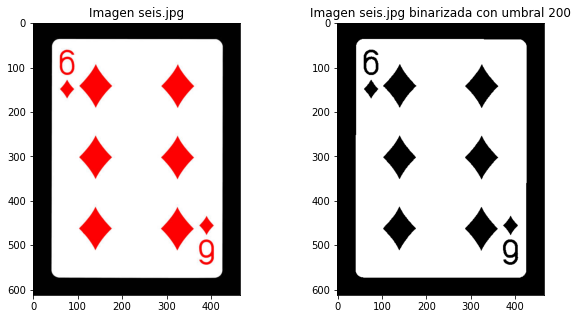

In [7]:
binary = makeBinary(img, 200) # hist(img.ravel(), 256, [0,256]) to choose threshold

fig, axs = plt.subplots(1,2)
fig.set_figheight(5)
fig.set_figwidth(10)

axs[0].imshow(img)
axs[0].set_title(f"Imagen {imgs[imgIndex]}")
axs[1].imshow(binary, cmap = 'gray')
axs[1].set_title(f"Imagen {imgs[imgIndex]} binarizada con umbral {200}")

In [249]:
def extractPattern(image):
    # interactive window backend
    matplotlib.use('TkAgg')
    
    fig = plt.figure(figsize = (14,7))
    plt.imshow(image, cmap = 'gray')
    [P,Q] = np.array(plt.ginput(n = 2, timeout = 30), int)

    # original backend
    %matplotlib inline
    pattern = image[P[1]:Q[1], P[0]:Q[0]] 
    plt.imshow(pattern, cmap = 'gray')
    return pattern

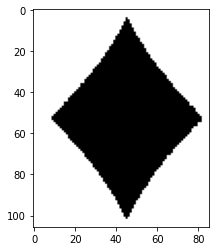

In [250]:
pat = extractPattern(binary)

In [251]:
def makeBalancedKernel():
    k = np.zeros((3,3))
    k[0:k.shape[0],0:k.shape[1]] = -1
    k[1,1] = 8
    return k

In [252]:
def getPatternFilter(pattern):
#     conv = scipy.signal.fftconvolve(pattern, makeBalancedKernel(), mode='same')
    conv = convolution(pattern, makeBalancedKernel())
    conv = np.flip(conv, 1)
    conv = np.flip(conv, 0)
    plt.imshow(conv, cmap = 'hot')
    plt.title("Filtro que detecta el patrón escogido")
    
    plt.show()
    return conv

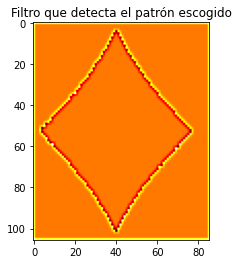

In [260]:
filt = getPatternFilter(pat)

In [254]:
def discretizeFilter(img, ndivs):
    # limpiar bordes
    image = np.copy(img)
    image[0,:] = image[:,0] = image[-1,:] = image[:,-1] = 0
    
    # step
    y = math.ceil(image.shape[0]/ydiv)
    x = math.ceil(image.shape[1]/xdiv)
    
    # promediar
    for i in range(ydiv-1):
        for j in range(xdiv-1):
            image[y*i:y*(i+1),x*j:x*(j+1)] = np.mean(image[y*i:y*(i+1),x*j:x*(j+1)])
        image[y*i:y*(i+1),x*(xdiv-1):image.shape[1]] = np.mean(image[y*i:y*(i+1),x*(xdiv-1):image.shape[1]])
    for j in range(xdiv-1):
        image[y*(ydiv-1):image.shape[0],x*j:x*(j+1)] = np.mean(image[y*(ydiv-1):image.shape[0],x*j:x*(j+1)])
    image[y*(ydiv-1):image.shape[0],x*(xdiv-1):image.shape[1]] = np.mean(image[y*(ydiv-1):image.shape[0],x*(xdiv-1):image.shape[1]])
    
    return image

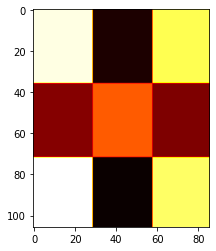

In [266]:
plt.imshow(discretizeFilter(filt, 3), 'hot')

In [257]:
def getImagenIntegral(img):
    output = np.zeros(img.shape)
    suma = 0
    for y in range(img.shape[0]):
        for x in range(img.shape[1]):
            suma += img[y,x]
            output[y,x] = suma
    return output
            

In [258]:
a = np.array([[1,2,3,4],
              [5,6,7,8],
              [9,10,11,12]])

getImagenIntegral(a)

array([[ 1.,  3.,  6., 10.],
       [15., 21., 28., 36.],
       [45., 55., 66., 78.]])

In [272]:
filt.shape

(106, 86)

0:36,0:29
0:36,29:58
0:36,58:87
36:72,0:29
36:72,29:58
36:72,58:87
72:108,0:29
72:108,29:58
72:108,58:87


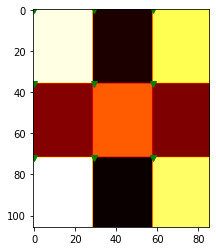

In [271]:
plt.imshow(discretizeFilter(filt, 3), 'hot')
ydiv = xdiv = 3
y = math.ceil(filt.shape[0]/ydiv)
x = math.ceil(filt.shape[1]/xdiv)
for i in range(ydiv):
    for j in range(xdiv):
#         image[y*i:y*(i+1),x*j:x*(j+1)] = np.mean(image[y*i:y*(i+1),x*j:x*(j+1)])
#         print(f"{y*i}:{y*(i+1)},{x*j}:{x*(j+1)}")
        plt.plot(x*j, y*i, marker='v', color="green")
    for j in range(xdiv-1):
        image[y*(ydiv-1):image.shape[0],x*j:x*(j+1)] = np.mean(image[y*(ydiv-1):image.shape[0],x*j:x*(j+1)])
        plt.plot(x*j, y*i, marker='v', color="green")

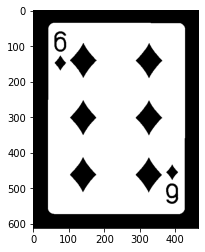

In [276]:
integral = getImagenIntegral(binary)
plt.imshow(binary, cmap = 'gray')

In [ ]:
def convolution(image, kernel):
    output = np.zeros([image.shape[0],image.shape[1]])

    # number of rows and columns of input image
    rows = image.shape[0]
    cols = image.shape[1]

    # number of rows and columns of kernel
    kRows = kernel.shape[0]
    kCols = kernel.shape[1]

    # offset between central pixel of kernel and top left (beginning of for loop)
    offsetX = math.floor(kRows/2)
    offsetY = math.floor(kCols/2)

    # convolution
    for y in range(rows):
        for x in range(cols):
            sum = 0
            for kY in range(kRows):
                for kX in range(kCols):
                    posX = (x - offsetX) + kX
                    posY = (y - offsetY) + kY
                    if ((min(posX,posY) < 0) | (posX >= cols) | (posY >= rows)): # zero padding
                        pixel = 0.0
                    else:
                        pixel = image[posY,posX]
                    sum += pixel*kernel[kY,kX]
            output[y,x] = sum
    return output

In [87]:
def promediar(input):
    nDivisions = (3,3)
    out = np.zeros(input.shape)
    rowPoints = []
    for y in np.arange(0,input.shape[0], math.floor(input.shape[0]/3)):
        colPoints = []
        for x in np.arange(0,input.shape[1], math.floor(input.shape[1]/3)):
            colPoints.append((x,y))
        rowPoints.append(colPoints)
    return rowPoints

In [78]:
filt.shape

(108, 79)

In [80]:
math.floor(108/3),math.floor(79/3)

(36, 26)

In [69]:
promediar(filt)

[[(0, 0), (26, 0), (52, 0), (78, 0)],
 [(0, 36), (26, 36), (52, 36), (78, 36)],
 [(0, 72), (26, 72), (52, 72), (78, 72)]]

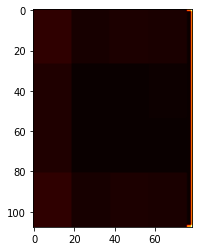

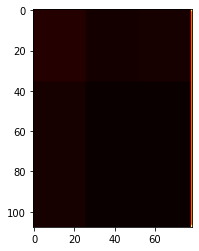

In [120]:
filt[y*2:y*3,x*2:x*3] = np.mean(filt[y*1:y*2,x*2:x*3])

plt.imshow(filt, cmap = 'hot')

In [121]:
filt

array([[ 0.2008547 ,  0.2008547 ,  0.2008547 , ...,  0.09294872,
         0.09294872,  5.        ],
       [ 0.2008547 ,  0.2008547 ,  0.2008547 , ...,  0.09294872,
         0.09294872,  3.        ],
       [ 0.2008547 ,  0.2008547 ,  0.2008547 , ...,  0.09294872,
         0.09294872,  3.        ],
       ...,
       [ 0.09935897,  0.09935897,  0.09935897, ..., -0.00961538,
        -0.00961538,  3.        ],
       [ 0.09935897,  0.09935897,  0.09935897, ..., -0.00961538,
        -0.00961538,  3.        ],
       [ 0.09935897,  0.09935897,  0.09935897, ..., -0.00961538,
        -0.00961538,  5.        ]])

In [25]:
108/3

36.0

In [10]:
def chooseTr(conv):
    im = conv.ravel()
    # interactive window backend
    matplotlib.use('TkAgg')
    
    fig = plt.figure(figsize = (14,7))
    plt.plot(im)
    tr = np.array(plt.ginput(n = 1, timeout = 30), int)[0][1]
    
    # original backend
    %matplotlib inline
    
    plt.plot(im)
    plt.title("Valores detecciones con umbral")
    plt.hlines(tr, 0, len(conv.ravel()), 'red')
    return tr